In [1]:
import numpy as np
import matplotlib.pyplot as p
from scipy.io import wavfile
import dft_wav as dft

44100


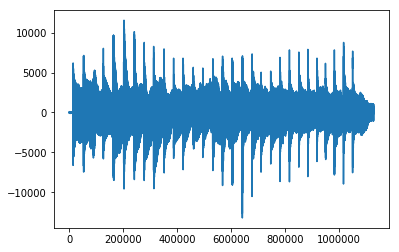

In [7]:
rate, data = wavfile.read("Recording_2.wav")
p.plot(data)
print(rate)

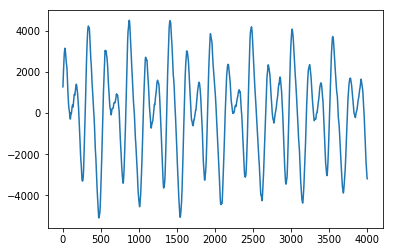

In [8]:
data1 = data[17000:21000]
p.plot(data1)

In [11]:
%%timeit
xt, vt = dft.dft(data1, rate)

635 ms ± 6.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


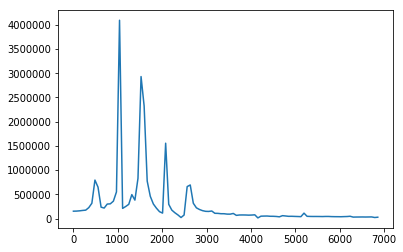

In [10]:
start = 0
end = 100
p.plot(xt[start:end],np.abs(vt[start:end]))
# sollte peak bei 83 Hz ergeben

In [ ]:
vtt = dft.idft(vt, rate)

In [ ]:
p.plot(np.abs(vtt-data1))